In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
!pip install scikit-learn==0.24

     |████████████████████████████████| 22.3MB 1.4MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [4]:
!pip install pmdarima

     |████████████████████████████████| 1.5MB 8.0MB/s 
     |████████████████████████████████| 9.5MB 33.6MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [5]:
filename = "/content/gdrive/My Drive/BITS/4-2/ASM_sop/Telangana1/dataset.csv"
# The data of all the files from year 2000-2014 of AP have been combined and put into one file called Dataset
df = pd.read_csv(filename)
df=df.iloc[:,:17]
df

,Year,Month,Day,Hour,Minute,Temperature,Clearsky DHI,Clearsky DNI,Clearsky GHI,Dew Point,DHI,DHI Perez,DNI,DNI Perez,Fill Flag,GHI,GHI Perez
0,2000,1,1,0,0,17,0,0,0,14,0,0,0,0,0,0,0
1,2000,1,1,1,0,17,0,0,0,15,0,0,0,0,0,0,0
2,2000,1,1,2,0,19,62,205,94,16,69,69,147,147,0,92,92
3,2000,1,1,3,0,23,131,463,297,17,131,138,463,460,0,297,303
4,2000,1,1,4,0,25,170,605,490,17,170,166,605,624,0,490,496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131395,2014,12,31,19,0,19,0,0,0,17,0,0,0,0,0,0,0
131396,2014,12,31,20,0,19,0,0,0,17,0,0,0,0,0,0,0
131397,2014,12,31,21,0,18,0,0,0,17,0,0,0,0,0,0,0
131398,2014,12,31,22,0,17,0,0,0,16,0,0,0,0,0,0,0


In [6]:
df['Date']=df['Year'].astype(str) + df['Month'].astype(str).str.zfill(2) + df['Day'].astype(str).str.zfill(2) + df['Hour'].astype(str).str.zfill(2)+df['Minute'].astype(str)

df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d%H%M')
df.head(10)

,Year,Month,Day,Hour,Minute,Temperature,Clearsky DHI,Clearsky DNI,Clearsky GHI,Dew Point,DHI,DHI Perez,DNI,DNI Perez,Fill Flag,GHI,GHI Perez,Date
0,2000,1,1,0,0,17,0,0,0,14,0,0,0,0,0,0,0,2000-01-01 00:00:00
1,2000,1,1,1,0,17,0,0,0,15,0,0,0,0,0,0,0,2000-01-01 01:00:00
2,2000,1,1,2,0,19,62,205,94,16,69,69,147,147,0,92,92,2000-01-01 02:00:00
3,2000,1,1,3,0,23,131,463,297,17,131,138,463,460,0,297,303,2000-01-01 03:00:00
4,2000,1,1,4,0,25,170,605,490,17,170,166,605,624,0,490,496,2000-01-01 04:00:00
5,2000,1,1,5,0,28,193,682,640,17,193,191,682,691,0,640,644,2000-01-01 05:00:00
6,2000,1,1,6,0,29,205,720,729,17,205,239,720,679,0,729,734,2000-01-01 06:00:00
7,2000,1,1,7,0,29,207,727,748,17,295,295,518,518,0,681,681,2000-01-01 07:00:00
8,2000,1,1,8,0,29,200,706,694,17,200,210,706,696,0,694,698,2000-01-01 08:00:00
9,2000,1,1,9,0,29,184,651,574,17,184,173,651,686,0,574,585,2000-01-01 09:00:00


In [7]:
X=df[['Date','GHI']]
X.set_index('Date',inplace=True)
print(X.shape)

(131400, 1)


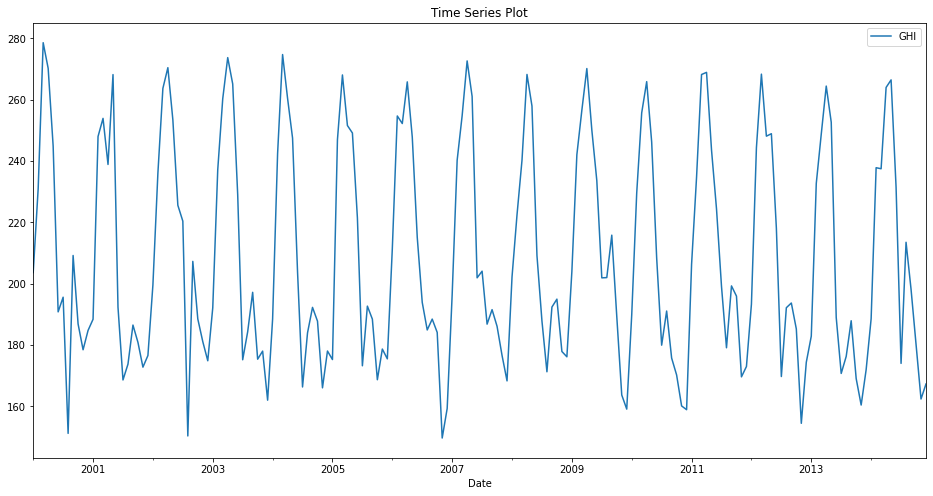

In [8]:
#y=X['GHI']
X=X.between_time('08:00','17:00',include_start=True,include_end=True)
X=X.reset_index()
y=X.resample('M',on='Date').mean()
y=y.dropna()
#y=np.log(y+1)
del X
del df
y.plot(figsize=[16,8],title='Time Series Plot')

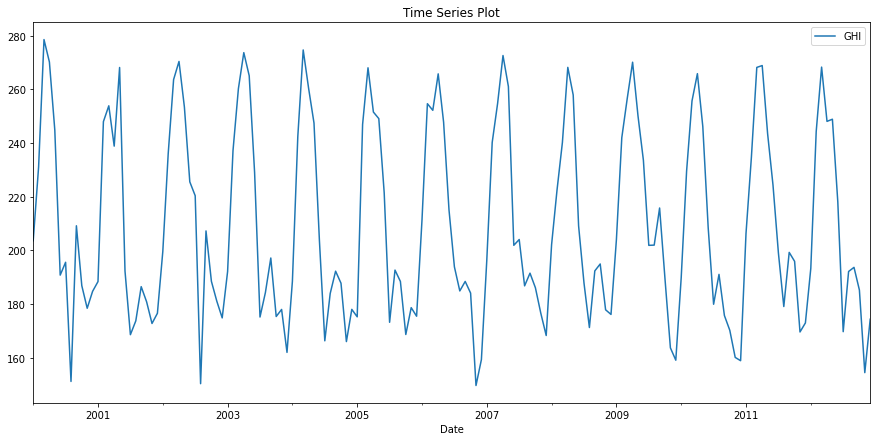

In [9]:
y[:'2012'].plot(figsize=[15,7],title='Time Series Plot')

In [10]:
X_train=y[:'2011']
X_test=y['2012':]

In [11]:
np.any(np.isnan(X_test))

False

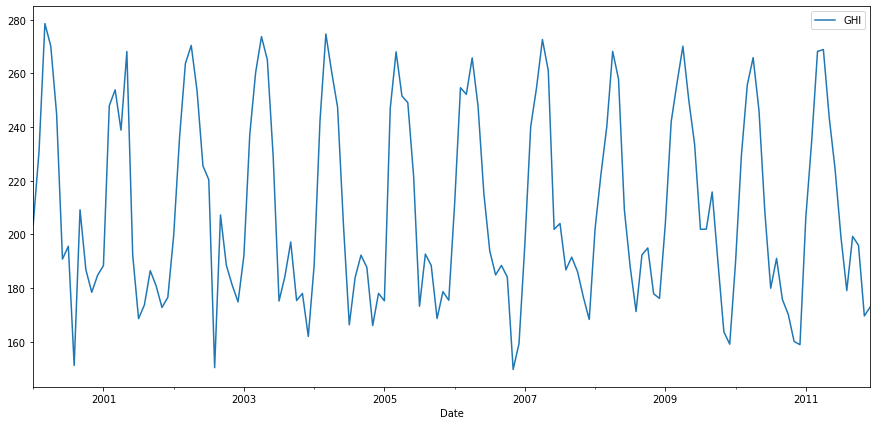

In [12]:
X_train.plot(figsize=(15,7))

In [13]:
from pmdarima.arima import auto_arima
stepwise_model = auto_arima(X_train, start_p=0, start_q=0,max_p=1,max_d=1,max_q=1, d=1, m=12,trace=True,error_action='ignore',suppress_warnings=True,stepwise=True)
stepwise_model.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=1245.515, Time=0.35 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1352.903, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1258.899, Time=0.26 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1321.090, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1350.912, Time=0.01 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=1319.181, Time=0.10 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=1281.403, Time=0.12 sec
 ARIMA(0,1,0)(2,0,1)[12] intercept   : AIC=1246.394, Time=0.47 sec
 ARIMA(0,1,0)(1,0,2)[12] intercept   : AIC=1246.745, Time=0.75 sec
 ARIMA(0,1,0)(0,0,2)[12] intercept   : AIC=1286.194, Time=0.51 sec
 ARIMA(0,1,0)(2,0,0)[12] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(0,1,0)(2,0,2)[12] intercept   : AIC=1245.670, Time=1.73 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=1209.120, Time=0.35 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=1321.092, Time=0.24 sec
 ARIMA(1,1,0)(2,0,1)[12]

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  144
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -593.565
Date:                            Sun, 02 May 2021   AIC                           1197.130
Time:                                    18:31:48   BIC                           1211.944
Sample:                                         0   HQIC                          1203.149
                                            - 144                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3156      0.133      2.380      0.017       0.056       0.576
ma.L1         -0.8480      0.094     -8.994      0.000      -1.033      -0.663
ar.S.L12       0.9951      0.011     94.138      0.000       0.974       1.016
ma.S.L12      -0.8656      0.140     -6.191      0.000      -1.140      -0.592
sigma2       176.0008     27.327      6.441      0.000     122.441     229.560
===================================================================================
Ljung-Box (L1) (Q):                   3.90   Jarque-Bera (JB):                 0.28
Prob(Q):                              0.05   Prob(JB):                         0.87
Heteroskedasticity (H):               0.36   Skew:                            -0.10
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [14]:
stepwise_model.fit(X_train)
#print(stepwise_model.summary())

ARIMA(order=(1, 1, 1), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)

In [15]:
X_test.shape

(36, 1)

In [16]:
pred=stepwise_model.predict(n_periods=36)

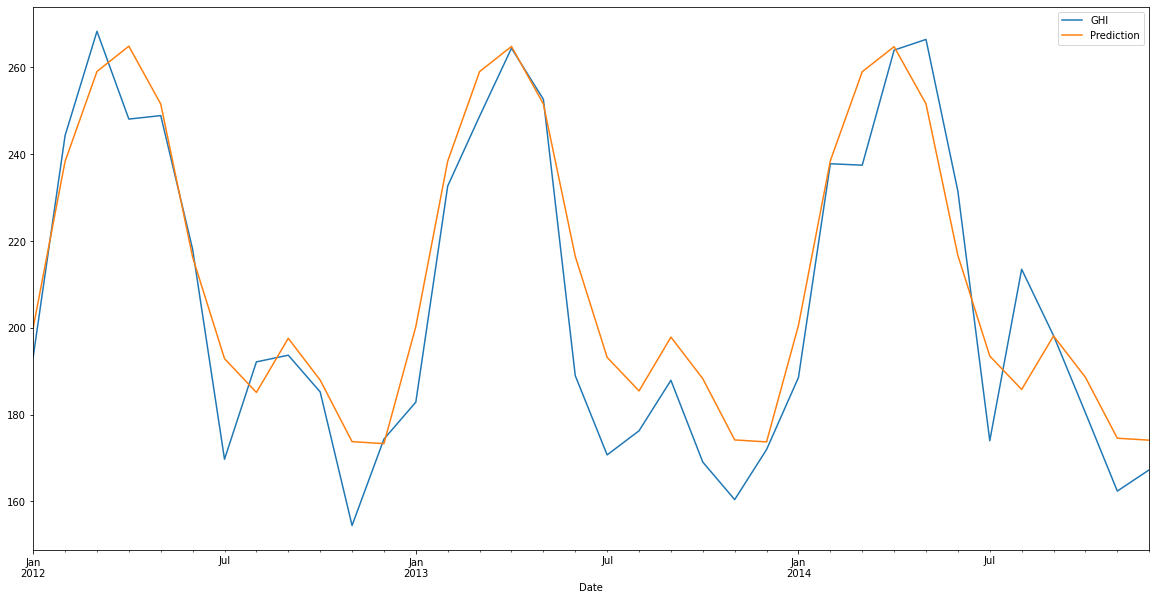

In [17]:
pred = pd.DataFrame(pred,index = X_test.index,columns=['Prediction'])
pd.concat([X_test,pred],axis=1).plot(figsize=(20,10))

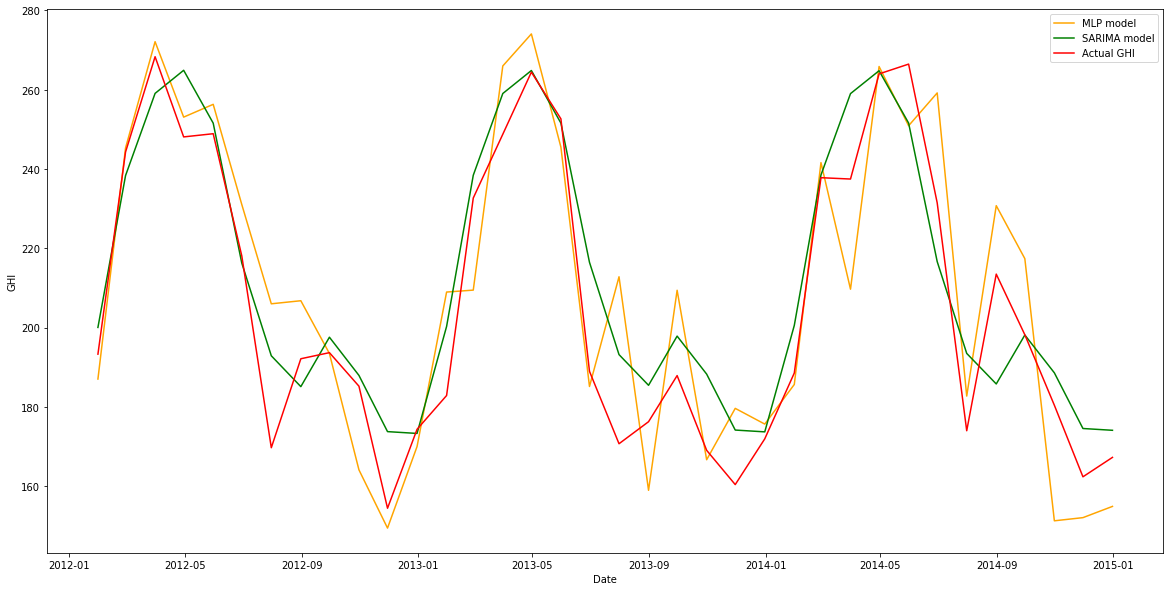

In [18]:
df1 = pd.read_csv('/content/gdrive/My Drive/BITS/4-2/ASM_sop/Code/Telangana1/MLP_monthly.csv')
#df2 = pd.read_csv('/content/gdrive/My Drive/BITS/4-2/ASM_sop/Code/Gujarat1/LSTM_monthly.csv')

plt.figure(figsize = (20,10))
plt.plot(X_test.index,df1['GHI'],color='orange',label='MLP model')
#plt.plot(df1['Date'],df2['GHI'], color= 'blue', label= 'LSTM model')
plt.plot(X_test.index,pred , color= 'green', label= 'SARIMA model') 
plt.plot(X_test.index,X_test , color= 'red', label= 'Actual GHI') 
plt.xlabel('Date')
plt.ylabel('GHI')
plt.legend()
plt.show()

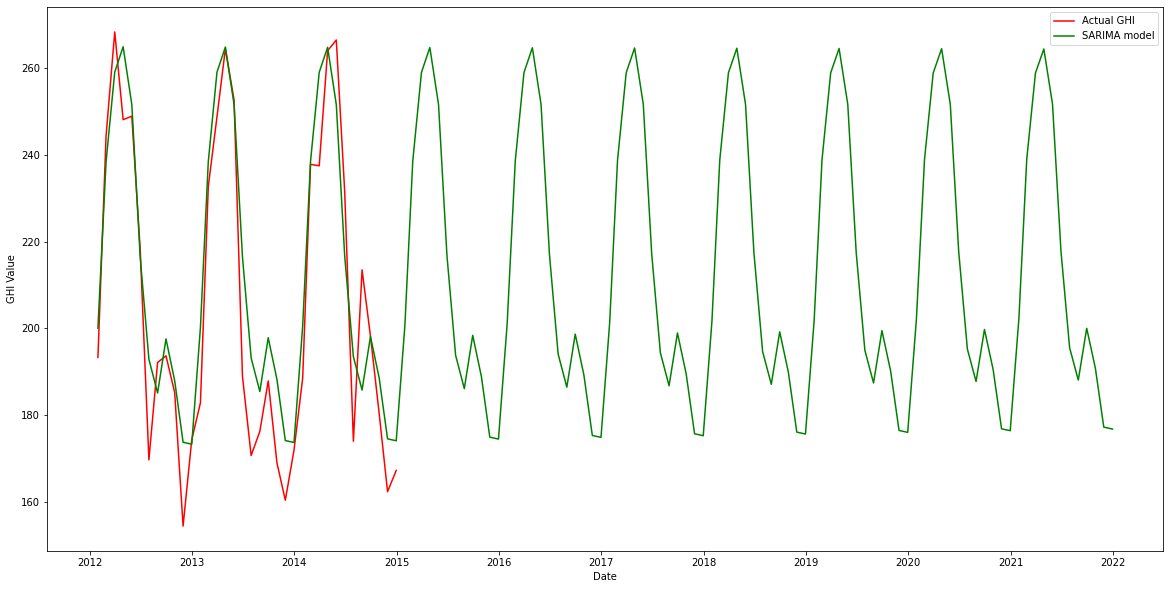

In [19]:
Fdates= pd.date_range('2012-01-01','2022-01-01' , freq='1M')
pred1=stepwise_model.predict(n_periods=120)
plt.figure(figsize = (20,10))
plt.plot(X_test.index,X_test , color= 'red', label= 'Actual GHI') 
plt.plot(Fdates,pred1 , color= 'green', label= 'SARIMA model') 
plt.xlabel('Date')
plt.ylabel('GHI Value')
plt.legend()
plt.show()

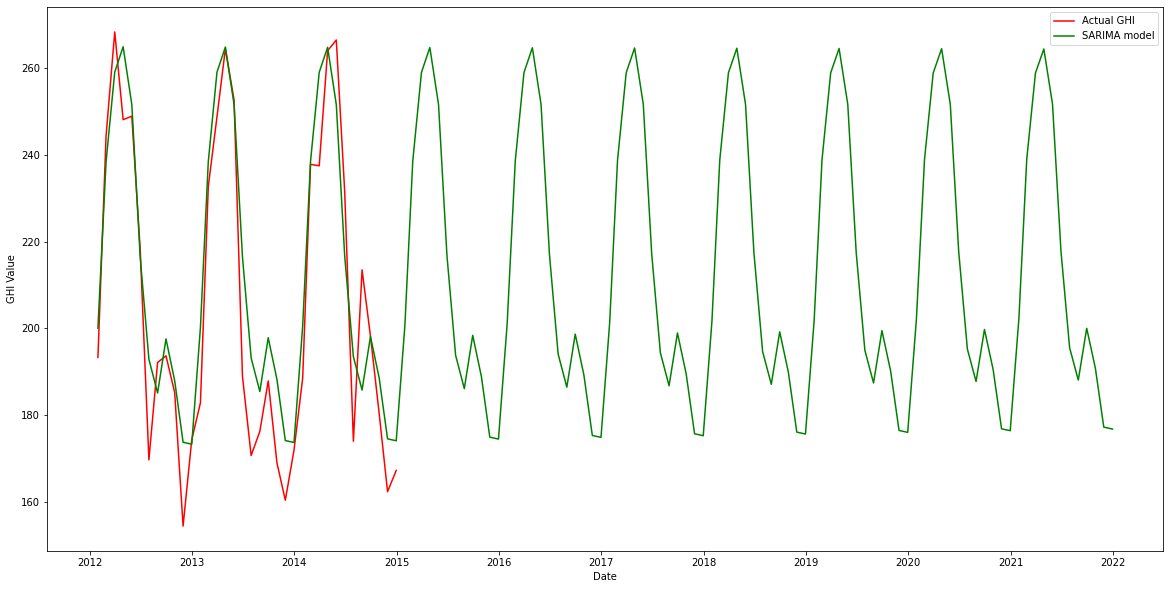

In [20]:
Fdates= pd.date_range('2012-01-01','2022-01-01' , freq='1M')
pred1=stepwise_model.predict(n_periods=120)
plt.figure(figsize = (20,10))
plt.plot(X_test.index,X_test , color= 'red', label= 'Actual GHI') 
plt.plot(Fdates,pred1 , color= 'green', label= 'SARIMA model') 
plt.xlabel('Date')
plt.ylabel('GHI Value')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(X_test,pred)

0.05448642894331575

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(X_test, pred, squared=False)

13.280206194212322